## Introduction:

This notebook is devoted to the implemention of a recommender system that recommends restaurants based on collecting the menu items from set of friends .. and searching for a common restaurant to recommend ..

The dataset is downloaded from Kaggle .. it contains 11 csv files related to the chef, the customer ratings, user payments, user profile, as well as geospatial data related to the place of the restaurant .. etc

The data folder contains a Readme file for more details related to the challenge datasets .. 

Dataset link ==> https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings/data

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df_user_profile = pd.read_csv('userprofile.csv', header = 0)

In [34]:
df_user_profile.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [35]:
np.shape(df_user_profile)

(138, 19)

The dataset contains data for 138 users and their corresponding 19 features .. 

In [36]:
df_user_profile.isnull().any()

userID              False
latitude            False
longitude           False
smoker              False
drink_level         False
dress_preference    False
ambience            False
transport           False
marital_status      False
hijos               False
birth_year          False
interest            False
personality         False
religion            False
activity            False
color               False
weight              False
budget              False
height              False
dtype: bool

In [37]:
df_user_profile.isnull().sum()

userID              0
latitude            0
longitude           0
smoker              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
hijos               0
birth_year          0
interest            0
personality         0
religion            0
activity            0
color               0
weight              0
budget              0
height              0
dtype: int64

Perfect ! :D ..

None of the attributes has missing values .. 

In [38]:
df_user_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
userID              138 non-null object
latitude            138 non-null float64
longitude           138 non-null float64
smoker              138 non-null object
drink_level         138 non-null object
dress_preference    138 non-null object
ambience            138 non-null object
transport           138 non-null object
marital_status      138 non-null object
hijos               138 non-null object
birth_year          138 non-null int64
interest            138 non-null object
personality         138 non-null object
religion            138 non-null object
activity            138 non-null object
color               138 non-null object
weight              138 non-null int64
budget              138 non-null object
height              138 non-null float64
dtypes: float64(3), int64(2), object(14)
memory usage: 20.6+ KB


there are 3 continuous variables, 2 int and 14 categorical variables in this dataset .. 

## Data Exploration:

### 1. Budget:

(array([  7.,   0.,   0.,   5.,   0.,   0.,  35.,   0.,   0.,  91.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

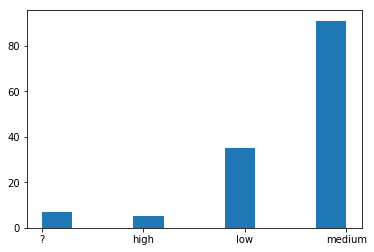

In [39]:
plt.hist(df_user_profile['budget'])

In [40]:
df_user_profile['budget'].unique()

array(['medium', 'low', '?', 'high'], dtype=object)

In [41]:
df_user_profile['budget'].value_counts()

medium    91
low       35
?          7
high       5
Name: budget, dtype: int64

In [42]:
df_user_profile['budget'].describe()

count        138
unique         4
top       medium
freq          91
Name: budget, dtype: object

Although the dataset doesn't contain any missing values .. 7 cells contains '?' as typo ! .. 

let's replace these cells with the mode (i.e. "medium") !

In [44]:
df_user_profile['budget'] = df_user_profile['budget'].replace('?' , df_user_profile['budget'].mode()[0])

In [45]:
df_user_profile['budget'].describe()

count        138
unique         3
top       medium
freq          98
Name: budget, dtype: object

Text(0.5,1,u'Users Budget')

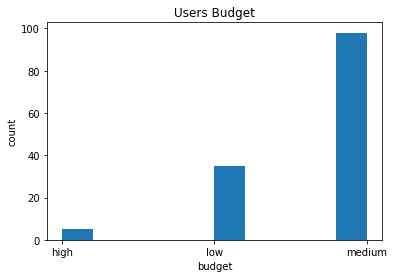

In [46]:
plt.hist(df_user_profile['budget'])
plt.xlabel('budget')
plt.ylabel('count')
plt.title('Users Budget')

### 2. Smokers:

In [48]:
df_user_profile['smoker'].describe()

count       138
unique        3
top       false
freq        109
Name: smoker, dtype: object

In [49]:
df_user_profile['smoker'].value_counts()

false    109
true      26
?          3
Name: smoker, dtype: int64

Has the same problem of having '?' value !

In [50]:
df_user_profile['smoker'] = df_user_profile['smoker'].replace('?' , df_user_profile['smoker'].mode()[0])

Text(0.5,1,u'Smoking Flag')

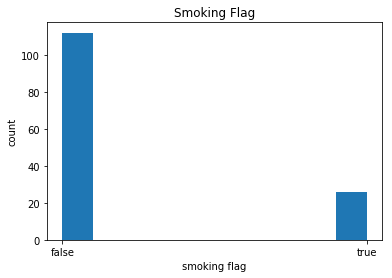

In [63]:
plt.hist(df_user_profile['smoker'])
plt.xlabel('smoking flag')
plt.ylabel('count')
plt.title('Smoking Flag')

The majority of the users are non-smokers ! :D

### 3. Weight: 

In [52]:
df_user_profile['weight'].describe()

count    138.000000
mean      64.869565
std       17.214332
min       40.000000
25%       53.000000
50%       65.000000
75%       74.750000
max      120.000000
Name: weight, dtype: float64

In [53]:
df_user_profile['weight'].value_counts()

40     18
65     11
60      8
68      7
69      7
50      5
80      4
58      4
75      4
70      4
52      3
59      3
85      3
57      3
55      3
53      3
90      3
54      3
66      3
76      3
87      2
72      2
73      2
74      2
49      2
82      2
47      2
88      1
51      1
110     1
46      1
45      1
44      1
108     1
64      1
103     1
61      1
62      1
63      1
98      1
97      1
94      1
118     1
92      1
77      1
79      1
83      1
84      1
120     1
Name: weight, dtype: int64

it seems that this attribute doesn't contain '?' value!

{'boxes': [<matplotlib.lines.Line2D at 0x7fcdad078a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcdad0873d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcdad087fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcdad087bd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcdad078b50>,
  <matplotlib.lines.Line2D at 0x7fcdad078f90>]}

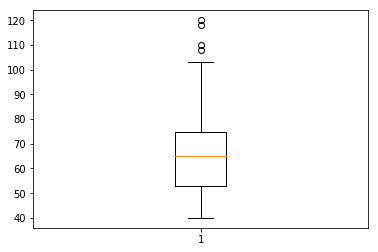

In [54]:
plt.boxplot(df_user_profile['weight'])

the weight of the users are a bit skewed ! .. with some outliers .. 

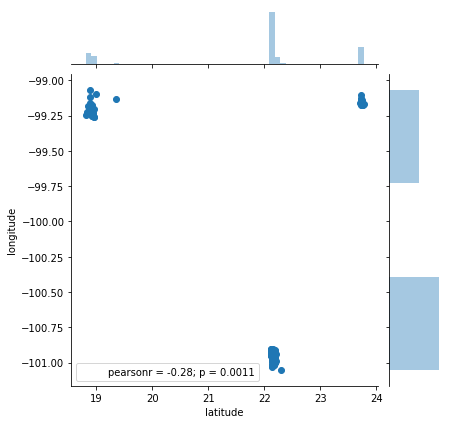

In [64]:
sns.jointplot(x="latitude",y="longitude", data=df_user_profile)

In [67]:
# from mpl_toolkits.basemap import Basemap
# # Define the projection, scale, the corners of the map, and the resolution.
# m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
#             llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# # Draw the coastlines
# m.drawcoastlines()
# # Color the continents
# m.fillcontinents(color='coral',lake_color='aqua')
# # draw parallels and meridians.
# m.drawparallels(np.arange(-90.,91.,30.))
# m.drawmeridians(np.arange(-180.,181.,60.))
# # fill in the oceans
# m.drawmapboundary(fill_color='aqua')
# plt.title("Mercator Projection")